In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-stock-data-1980-2024/data.csv


In [2]:
train=pd.read_csv('/kaggle/input/intel-stock-data-1980-2024/data.csv')
train.sample(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
939,1983-12-01 00:00:00-05:00,0.484967,0.490775,0.482063,0.487871,19358400,0.0,0.0
9023,2015-12-23 00:00:00-05:00,27.621480,27.700511,27.487125,27.660995,12526500,0.0,0.0
10750,2022-11-02 00:00:00-04:00,26.896864,27.448692,26.078636,26.088150,51956100,0.0,0.0
10299,2021-01-20 00:00:00-05:00,52.650434,53.536378,52.514829,53.039162,28701300,0.0,0.0
7056,2008-03-04 00:00:00-05:00,12.049438,12.294719,11.920666,12.264059,124099900,0.0,0.0
11030,2023-12-14 00:00:00-05:00,44.415153,46.447930,44.059914,44.582909,70620800,0.0,0.0
7668,2010-08-06 00:00:00-04:00,13.543599,13.782018,13.517107,13.676054,50833800,0.0,0.0
8956,2015-09-18 00:00:00-04:00,22.931443,23.088401,22.609681,22.774487,60693400,0.0,0.0
8516,2013-12-18 00:00:00-05:00,18.375651,18.740041,18.241794,18.702858,42680500,0.0,0.0
10601,2022-03-31 00:00:00-04:00,47.848015,47.904085,46.268654,46.315384,43698300,0.0,0.0


In [3]:
train.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,11289.000000,11289.000000,11289.000000,11289.000000,1.128900e+04,11289.000000,11289.000000
mean,14.986168,15.185892,14.787731,14.985933,5.064025e+07,0.001581,0.001373
std,14.708247,14.892642,14.526521,14.709644,3.475946e+07,0.019592,0.051749
min,0.121968,0.121968,0.120516,0.120516,0.000000e+00,0.000000,0.000000
25%,0.810214,0.827638,0.797147,0.814571,2.744880e+07,0.000000,0.000000
50%,12.757638,12.917269,12.590077,12.742243,4.456490e+07,0.000000,0.000000
75%,22.624974,22.879999,22.350709,22.617407,6.459720e+07,0.000000,0.000000
max,62.028760,62.292520,60.600833,62.083344,5.677088e+08,0.365000,2.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11289 non-null  object 
 1   Open          11289 non-null  float64
 2   High          11289 non-null  float64
 3   Low           11289 non-null  float64
 4   Close         11289 non-null  float64
 5   Volume        11289 non-null  int64  
 6   Dividends     11289 non-null  float64
 7   Stock Splits  11289 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 705.7+ KB


In [5]:
null_val= train.isnull().sum()
null_val

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
# Step 2: Parse and format the 'Date' column
train['Date'] = pd.to_datetime(train['Date'])

# Set 'Date' as the index for time-series analysis
train.set_index('Date', inplace=True)

# Display the first few rows to confirm changes
train.head()

<ipython-input-6-2db4a21ca08b>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  train['Date'] = pd.to_datetime(train['Date'])


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0


In [7]:
# Step 3: Feature Engineering

# Create a new feature for daily percentage return
train['Daily Return'] = train['Close'].pct_change() * 100

# Create moving averages (e.g., 7-day and 30-day)
train['7-Day MA'] = train['Close'].rolling(window=7).mean()
train['30-Day MA'] = train['Close'].rolling(window=30).mean()

# Display the fi

In [8]:
train['7-Day MA'] = train['7-Day MA'].fillna(method='ffill').fillna(method='bfill')
train['30-Day MA'] = train['30-Day MA'].fillna(method='ffill').fillna(method='bfill')

# Replace NaN in Daily Return with 0, as no change can be assumed initially
train['Daily Return'] =train['Daily Return'].fillna(0)

# Confirm no NaN values remain in the dataset
missing_values_after = train.isnull().sum()


<ipython-input-8-97b82c87fd9f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['7-Day MA'] = train['7-Day MA'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-8-97b82c87fd9f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['30-Day MA'] = train['30-Day MA'].fillna(method='ffill').fillna(method='bfill')


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Step 5: Normalize/Scale data
scaler = MinMaxScaler()

# Columns to normalize
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return', '7-Day MA', '30-Day MA']

# Apply MinMaxScaler
data_scaled = train.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

# Display the first few rows of the scaled dataset
data_scaled.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,7-Day MA,30-Day MA
Date,,,,,,,,,,
1980-03-17 00:00:00-05:00,0.000962,0.001004,0.001008,0.000984,0.019244,0.0,0.0,0.496953,0.00093,0.000672
1980-03-18 00:00:00-05:00,0.000962,0.000981,0.000984,0.000961,0.030066,0.0,0.0,0.481698,0.00093,0.000672
1980-03-19 00:00:00-05:00,0.001009,0.001051,0.001056,0.001031,0.032603,0.0,0.0,0.543089,0.00093,0.000672
1980-03-20 00:00:00-05:00,0.001009,0.001039,0.001044,0.001019,0.019683,0.0,0.0,0.489445,0.00093,0.000672
1980-03-21 00:00:00-05:00,0.000938,0.000934,0.000936,0.000914,0.021442,0.0,0.0,0.429111,0.00093,0.000672


In [10]:
train.head()
import datetime as dt

In [11]:
import matplotlib.pyplot as plt

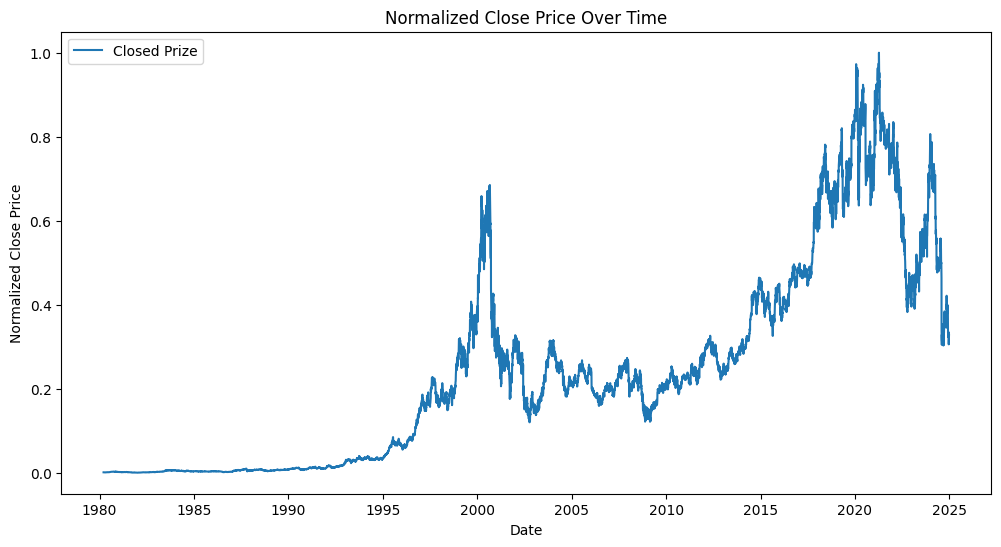

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data_scaled.index,data_scaled["Close"],label="Closed Prize")
plt.title('Normalized Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()

plt.show()

**Close price Over Time suggested that price exhibits long-term trends and periods of volatility, there is a clear phase of growth and declined, suggesting cyclical behavior or responses to market events**

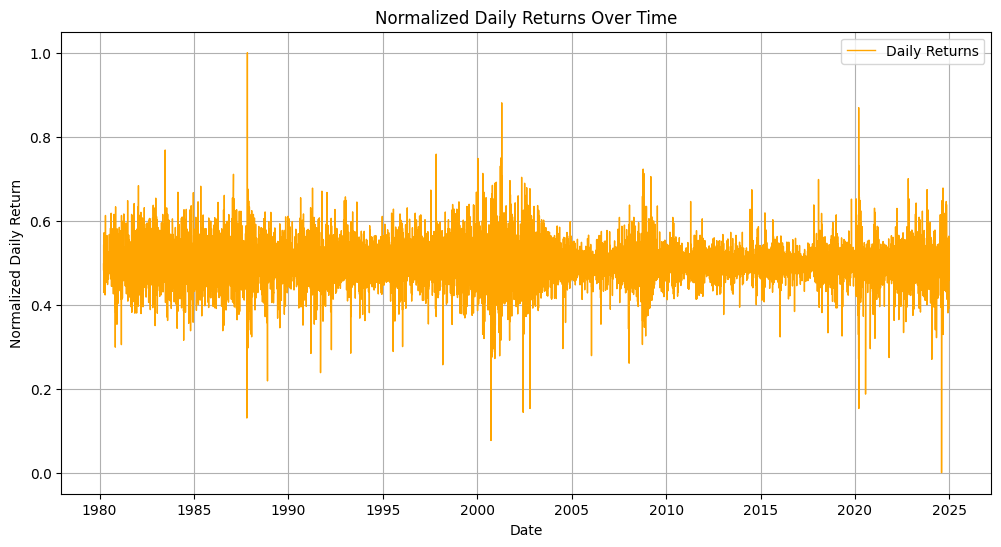

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data_scaled.index, data_scaled['Daily Return'], label='Daily Returns', color='orange', linewidth=1)
plt.title('Normalized Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Daily Return')
plt.legend()
plt.grid()
plt.show()

**Significant fluctuations in daily returns indicate periods of high volatility. Most changes are clustered around a stable range, but occasional spikes suggest external market events or announcements impacting the stock.**

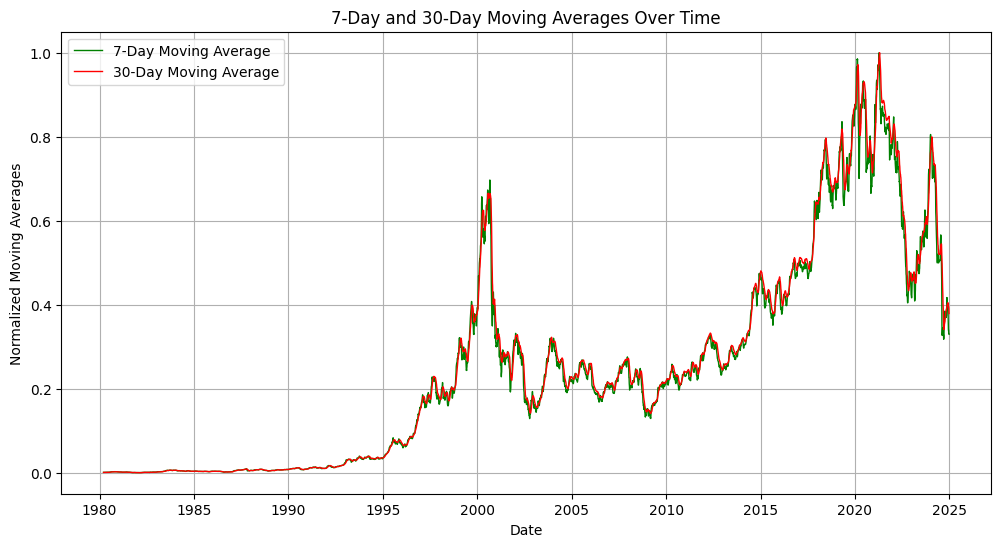

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data_scaled.index, data_scaled['7-Day MA'], label='7-Day Moving Average', color='green', linewidth=1)
plt.plot(data_scaled.index, data_scaled['30-Day MA'], label='30-Day Moving Average', color='red', linewidth=1)
plt.title('7-Day and 30-Day Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Moving Averages')
plt.legend()
plt.grid()
plt.show()

**The 7-day moving average closely follows short-term price movements, while the 30-day moving average smooths out short-term noise**

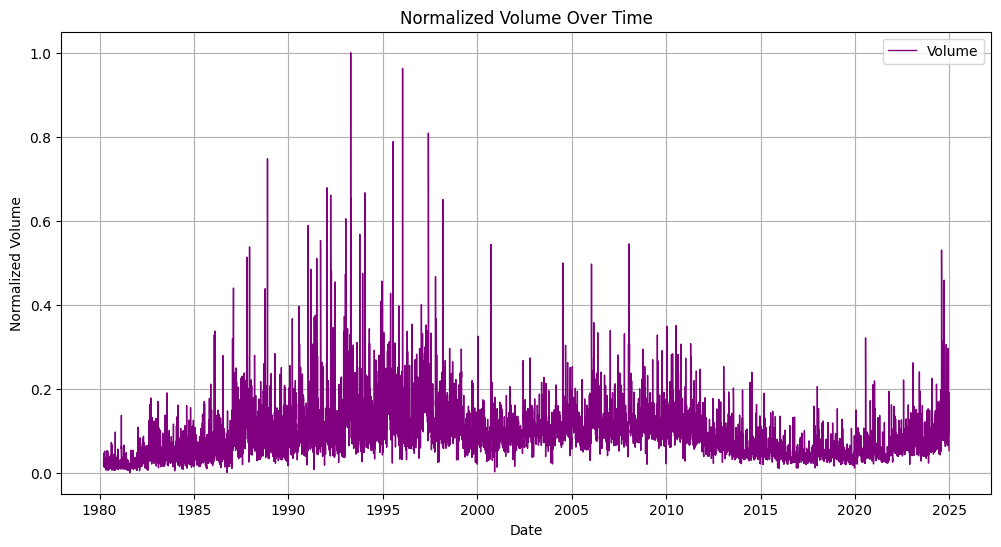

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple', linewidth=1)
plt.title('Normalized Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Volume')
plt.legend()
plt.grid()
plt.show()


**Trading volume shows peaks that may coincide with major price movements, indicating strong market activity during key periods. Sustained high or low volumes provide clues about market interest and liquidity.**

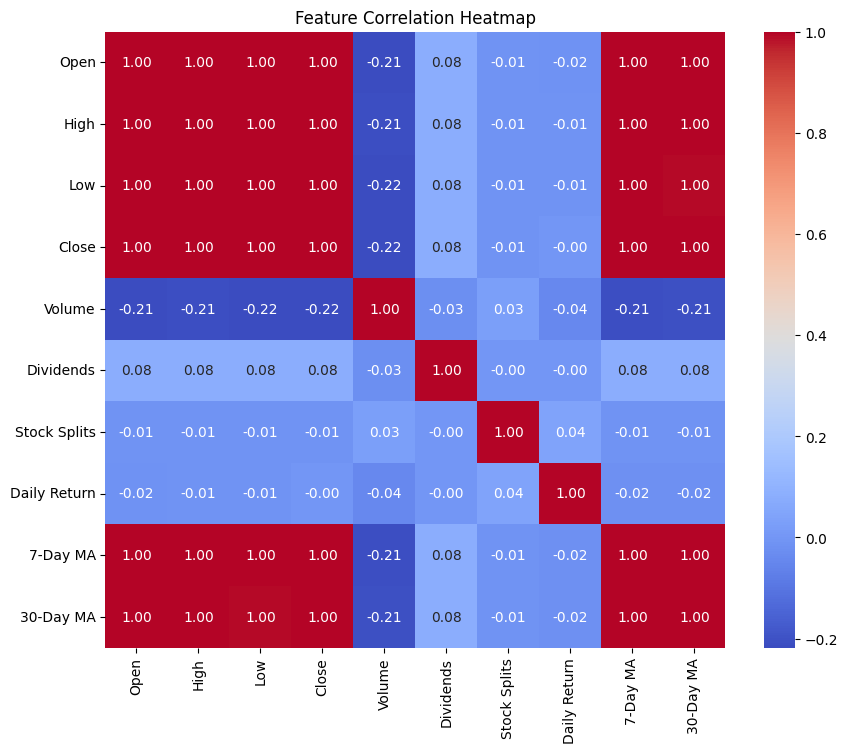

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()



**Strong positive correlation between Open, High, Low, and Close prices, which is expected due to the inherent relationship among these metrics. Moderate correlation between price metrics and volume suggests that price changes are partially influenced by trading activity.**

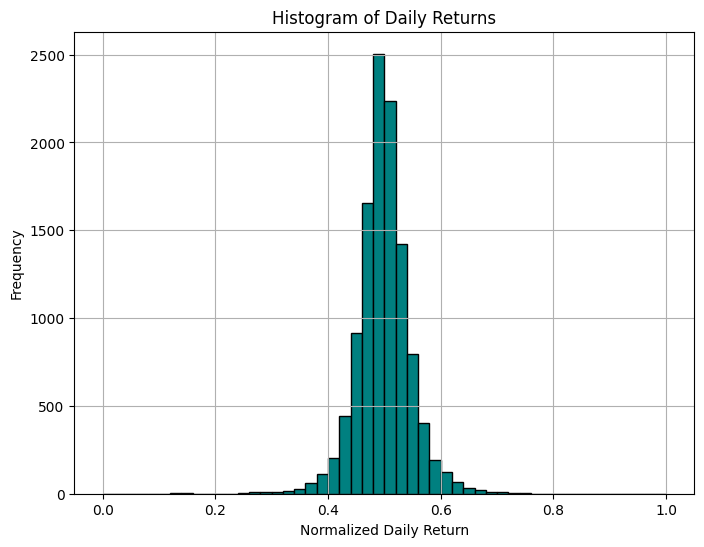

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(data_scaled['Daily Return'], bins=50, color='teal', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Normalized Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**The presence of extreme values (long tails) suggests rare but significant gains or losses, which could represent market shocks or anomalies.**

<Figure size 1000x800 with 0 Axes>

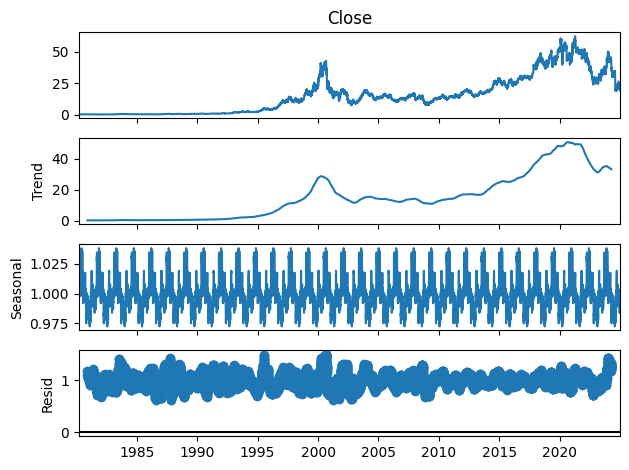

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform Seasonal Decomposition on the Close Price
result = seasonal_decompose(train['Close'], model='multiplicative', period=365)

# Plot the decomposition results
plt.figure(figsize=(10, 8))
result.plot()
plt.tight_layout()
plt.show()

* Observed: The original time-series data, showing the actual closing price.
* Trend: The long-term movement in the closing price, indicating the overall upward or downward trajectory.
* Seasonal: Repeating patterns or cycles observed in the data, typically on an annual basis.
* Residual: The noise or irregularities remaining after removing the trend and seasonal components.

# Adding new Features

In [19]:
for lag in range(1, 6):
    train[f'Close_Lag_{lag}'] = train['Close'].shift(lag)

# Check the dataset to confirm new columns
train.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,7-Day MA,30-Day MA,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5
Date,,,,,,,,,,,,,,,
1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0,0.000000,0.179218,0.173465,NaN,NaN,NaN,NaN,NaN
1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0,-0.799935,0.179218,0.173465,0.181500,NaN,NaN,NaN,NaN
1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0,2.419199,0.179218,0.173465,0.180048,0.181500,NaN,NaN,NaN
1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0,-0.393694,0.179218,0.173465,0.184404,0.180048,0.181500,NaN,NaN
1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0,-3.557432,0.179218,0.173465,0.183678,0.184404,0.180048,0.181500,NaN
1980-03-24 00:00:00-05:00,0.176417,0.176417,0.173514,0.173514,8966400,0.0,0.0,-2.049001,0.179218,0.173465,0.177143,0.183678,0.184404,0.180048,0.181500
1980-03-25 00:00:00-05:00,0.174240,0.177144,0.174240,0.174240,11347200,0.0,0.0,0.418462,0.179218,0.173465,0.173514,0.177143,0.183678,0.184404,0.180048
1980-03-26 00:00:00-05:00,0.174240,0.175692,0.172788,0.172788,16262400,0.0,0.0,-0.833300,0.177973,0.173465,0.174240,0.173514,0.177143,0.183678,0.184404
1980-03-27 00:00:00-05:00,0.169884,0.169884,0.166980,0.166980,26918400,0.0,0.0,-3.361440,0.176106,0.173465,0.172788,0.174240,0.173514,0.177143,0.183678


In [20]:
train.dropna(inplace=True)

# Verify no NaN values remain
print(train.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Daily Return    0
7-Day MA        0
30-Day MA       0
Close_Lag_1     0
Close_Lag_2     0
Close_Lag_3     0
Close_Lag_4     0
Close_Lag_5     0
dtype: int64


# Price Volatility Measures

In [21]:
train['Rolling_Std'] = train['Close'].rolling(window=10).std()

# Price Ratio

In [22]:
train['High_Low_Ratio'] = train['High'] / train['Low']

# Feature Scaling

In [23]:
features_to_scale = train.columns

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the selected features
data_scaled = train.copy()
data_scaled[features_to_scale] = scaler.fit_transform(train[features_to_scale])

# Display the first few rows of the scaled dataset
print(data_scaled.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
1980-03-24 00:00:00-05:00  0.000880  0.000876  0.000876  0.000855  0.015794   
1980-03-25 00:00:00-05:00  0.000844  0.000887  0.000888  0.000867  0.019988   
1980-03-26 00:00:00-05:00  0.000844  0.000864  0.000864  0.000844  0.028646   
1980-03-27 00:00:00-05:00  0.000774  0.000771  0.000768  0.000750  0.047416   
1980-03-28 00:00:00-05:00  0.000833  0.000876  0.000876  0.000855  0.035410   

                           Dividends  Stock Splits  Daily Return  7-Day MA  \
Date                                                                         
1980-03-24 00:00:00-05:00        0.0           0.0      0.457877  0.000930   
1980-03-25 00:00:00-05:00        0.0           0.0      0.504934  0.000930   
1980-03-26 00:00:00-05:00        0.0           0.0      0.481062  0.000910   
1980-03-27 00:00:00-05:00        0.0           0.0      

In [24]:
data_scaled.dropna(inplace=True)

In [25]:
data_scaled.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,7-Day MA,30-Day MA,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Rolling_Std,High_Low_Ratio
Date,,,,,,,,,,,,,,,,,
1980-04-07 00:00:00-05:00,0.000880,0.000876,0.000876,0.000855,0.023742,0.0,0.0,0.450252,0.000879,0.000672,0.000926,0.000984,0.000961,0.000949,0.000855,0.000558,0.060666
1980-04-08 00:00:00-05:00,0.000844,0.000887,0.000888,0.000867,0.051407,0.0,0.0,0.504934,0.000896,0.000672,0.000855,0.000926,0.000984,0.000961,0.000949,0.000553,0.060413
1980-04-09 00:00:00-05:00,0.000833,0.000829,0.000828,0.000808,0.020360,0.0,0.0,0.457225,0.000889,0.000672,0.000867,0.000855,0.000926,0.000984,0.000961,0.000599,0.061698
1980-04-10 00:00:00-05:00,0.000786,0.000817,0.000816,0.000797,0.026042,0.0,0.0,0.488837,0.000867,0.000672,0.000808,0.000867,0.000855,0.000926,0.000984,0.000643,0.061962
1980-04-11 00:00:00-05:00,0.000774,0.000817,0.000816,0.000797,0.016775,0.0,0.0,0.496953,0.000842,0.000672,0.000797,0.000808,0.000867,0.000855,0.000926,0.000561,0.061962


# train test split

In [26]:
train_size = int(len(data_scaled) * 0.8)  # 80% for training, 20% for testing

# Step 3: Split the data
train = data_scaled.iloc[:train_size]  # First 80% as training data
test = data_scaled.iloc[train_size:]   # Remaining 20% as testing data
print(f"Training data size: {len(train)} rows")
print(f"Testing data size: {len(test)} rows")

Training data size: 9020 rows
Testing data size: 2255 rows


# Visualize the Split

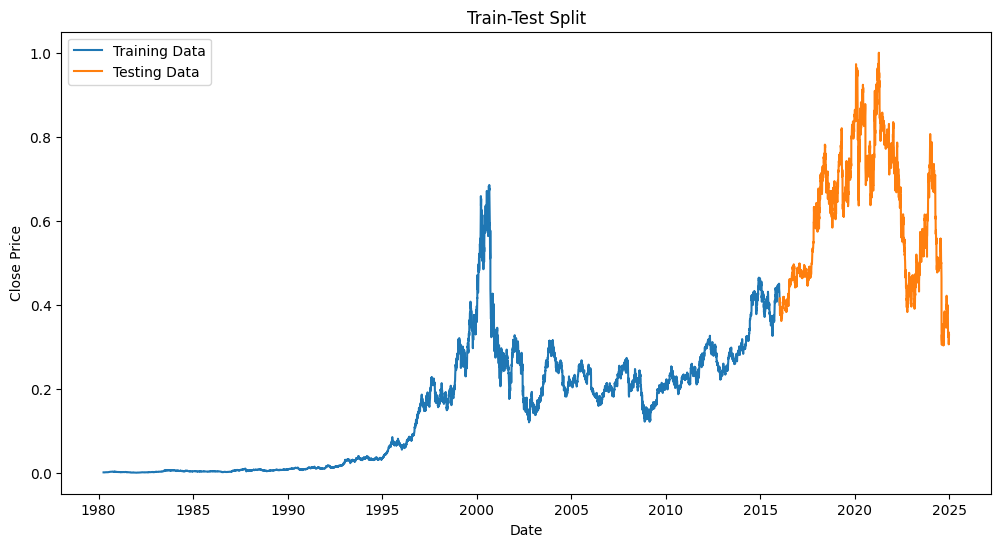

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Testing Data')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Forecasting Using ARIMA (AutoRegressive Integrated Moving Average)

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Close'], order=(5, 1, 0))  # Adjust p, d, q after testing
fitted_model = model.fit()

# Forecast future values
forecast_steps = 36  # 24 months
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, freq='M')[1:]

forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

# plot

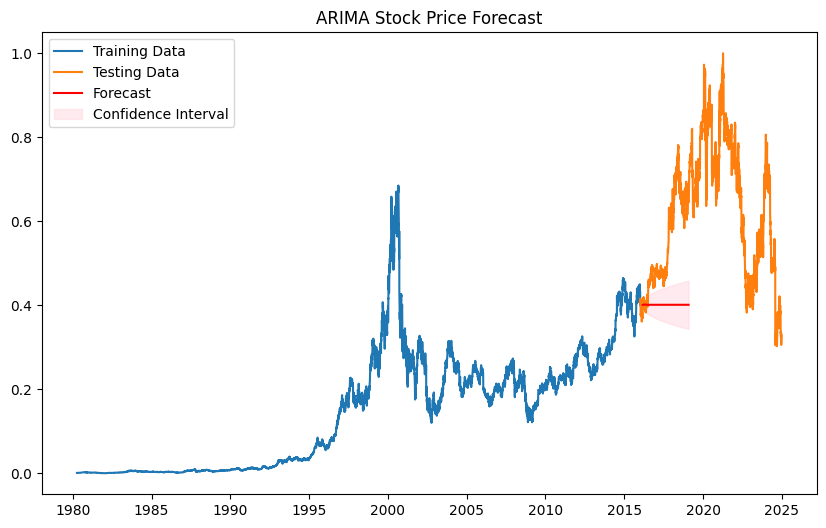

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Testing Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Stock Price Forecast')
plt.legend()
plt.show()

* Blue Line (Training Data): The historical stock prices used to train the ARIMA model, covering a period from 1980 to approximately 2015.
* Orange Line (Testing Data): The actual stock prices after the training period, used to evaluate the model's predictive performance.
* Red Line (Forecast): The model’s forecasted stock prices beyond the training data. It starts at the end of the training data and attempts to predict future trends.
* Pink Shaded Area (Confidence Interval): Indicates the uncertainty range of the forecast. Wider intervals reflect higher uncertainty in the predictions

# Forecasting Using Linear Regression with Moving Averages¶

<ipython-input-30-7f96e05e3bca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SMA_50'] = train['Close'].rolling(window=50).mean()
<ipython-input-30-7f96e05e3bca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SMA_200'] = train['Close'].rolling(window=200).mean()
<ipython-input-30-7f96e05e3bca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

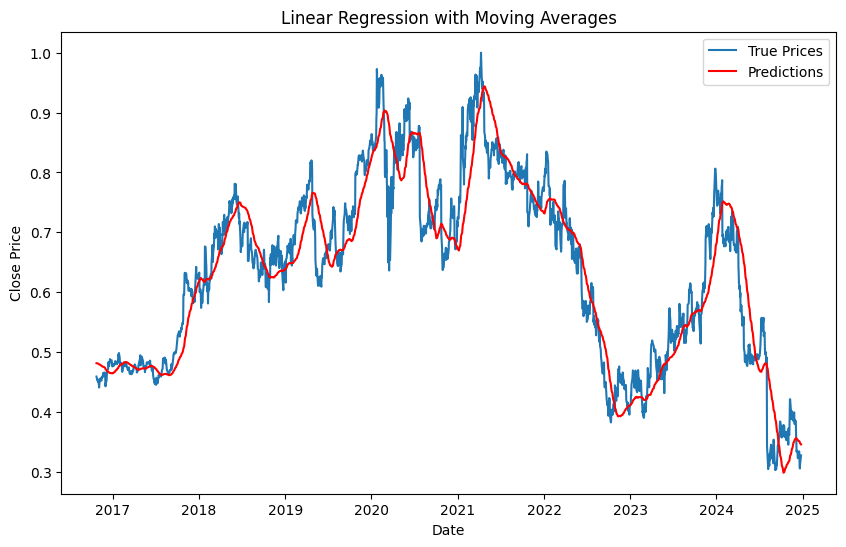

In [30]:
from sklearn.linear_model import LinearRegression

# Feature engineering: Moving averages
train['SMA_50'] = train['Close'].rolling(window=50).mean()
train['SMA_200'] = train['Close'].rolling(window=200).mean()

# Drop NaN values caused by rolling
train.dropna(inplace=True)

# Prepare data
X_train = train[['SMA_50', 'SMA_200']]
y_train = train['Close']

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
test['SMA_50'] = test['Close'].rolling(window=50).mean()
test['SMA_200'] = test['Close'].rolling(window=200).mean()
test.dropna(inplace=True)

X_test = test[['SMA_50', 'SMA_200']]
y_test = test['Close']

predictions = lr_model.predict(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='True Prices')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Linear Regression with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Blue Line (True Prices): Represents the actual historical stock prices (Close prices) from the dataset. Red Line (Predictions): Represents the stock price predictions made by the linear regression model, using moving averages (e.g., 7-Day MA, 30-Day MA) as input features.**